In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [39]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [44]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ...:                           'foo', 'bar', 'foo', 'foo'],
   ...:                    'B' : ['one', 'one', 'two', 'three',
   ...:                           'two', 'two', 'one', 'three'],
   ...:                    'C' : np.random.randn(8),
   ...:                    'D' : np.random.randn(8)})
   ...: 
df

,A,B,C,D
0,foo,one,-0.662268,-0.148287
1,bar,one,-0.277837,0.431743
2,foo,two,-1.254840,-0.358129
3,bar,three,0.423123,1.113824
4,foo,two,0.524239,-2.422847
5,bar,two,-0.193203,1.443784
6,foo,one,0.465628,-0.202927
7,foo,three,-0.010284,1.837683


In [5]:
grouped = df.groupby('A')

In [6]:
def get_letter_type(letter):
   ...:     if letter.lower() in 'aeiou':
   ...:         return 'vowel'
   ...:     else:
   ...:         return 'consonant'
   ...: 
        
grouped = df.groupby(get_letter_type, axis=1)
grouped

In [7]:
lst = [1, 2, 3, 1, 2, 3]

In [8]:
# Lst is the indices first argument is the values
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [9]:
# Obtaining the first three rows
grouped = s.groupby(level=0)
grouped.first()

1    1
2    2
3    3
dtype: int64

In [10]:
# Last three rows
grouped.last()

1    10
2    20
3    30
dtype: int64

In [11]:
# Summing rows with shared indices
grouped.sum()

1    11
2    22
3    33
dtype: int64

In [12]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [13]:
# Sum values of Y for shared values of X
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [14]:
# Same idea but no sorting
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


In [15]:
df3 = pd.DataFrame({'X' : ['A', 'B', 'A', 'B'], 'Y' : [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [16]:
# Group by the values in X and get everything in A's group
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [17]:
# Same idea but with B
df3.groupby(['X']).get_group('B')

,X,Y
1,B,4
3,B,2


In [18]:
# Dict whose keys are the computed unique groups and corresponding values being the axis labels 
# belonging to each group

# Bar is at index 1, index 3, and index 5
# Foo is at index 0, 2, 4, 6, and 7
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [19]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': Index([u'B', u'C', u'D'], dtype='object'),
 'vowel': Index([u'A'], dtype='object')}

In [20]:
grouped.groups

{1: Int64Index([1, 1], dtype='int64'),
 2: Int64Index([2, 2], dtype='int64'),
 3: Int64Index([3, 3], dtype='int64')}

In [21]:
len(grouped)

3

In [22]:
df

,A,B,C,D
0,foo,one,-0.662268,-0.148287
1,bar,one,-0.277837,0.431743
2,foo,two,-1.254840,-0.358129
3,bar,three,0.423123,1.113824
4,foo,two,0.524239,-2.422847
5,bar,two,-0.193203,1.443784
6,foo,one,0.465628,-0.202927
7,foo,three,-0.010284,1.837683


In [23]:
grouped = df.groupby(['A', 'B'])
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [24]:
len(grouped)

6

In [25]:
df

,A,B,C,D
0,foo,one,-0.662268,-0.148287
1,bar,one,-0.277837,0.431743
2,foo,two,-1.254840,-0.358129
3,bar,three,0.423123,1.113824
4,foo,two,0.524239,-2.422847
5,bar,two,-0.193203,1.443784
6,foo,one,0.465628,-0.202927
7,foo,three,-0.010284,1.837683


In [26]:
gb = df.groupby('gender')

KeyError: 'gender'

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

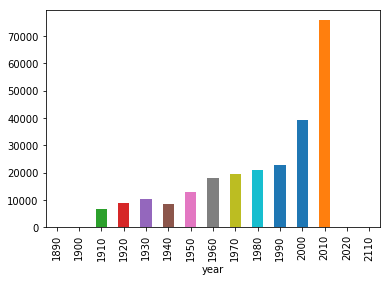

In [27]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

In [28]:
hamlet = titles[titles.title == 'Hamlet']
hamlet.groupby(hamlet.year // 10 * 10).size()

year
1910    3
1920    1
1940    1
1950    1
1960    2
1970    2
1980    1
1990    2
2000    2
2010    5
dtype: int64

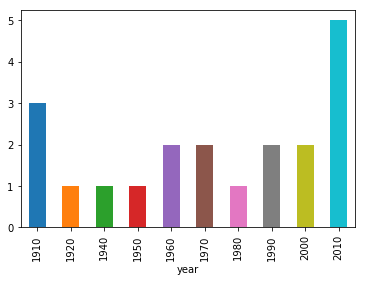

In [29]:
hamlet.groupby(hamlet.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [30]:
leading_1950 = cast[(cast.n == 1) & (cast.year // 10 == 195)]
leading_1950.groupby([leading_1950.year, leading_1950.type]).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

In [31]:
leading_1950.groupby(['year', 'type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [32]:
ninety50 = cast[(cast.year // 10 == 195) & (cast.n < 6)]
ninety50.groupby(['n', 'type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [33]:
cast[cast.title.str.startswith('The Pink Panther')].groupby('year').size()

year
1963    21
1976    70
2006    90
2009    84
dtype: int64

In [34]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n')
c

,title,year,name,type,character,n
1448576,The Pink Panther,2006,Steve Martin,actor,Clouseau,1.0
1665840,The Pink Panther,1963,David Niven,actor,Sir Charles Lytton,1.0
2059166,The Pink Panther,1963,Peter Sellers,actor,Insp. Jacques Clouseau,2.0
1214836,The Pink Panther,2006,Kevin Kline,actor,Dreyfus,2.0
2383167,The Pink Panther,1963,Robert Wagner,actor,George Lytton,3.0
1900905,The Pink Panther,2006,Jean Reno,actor,Ponton,3.0
3324588,The Pink Panther,2006,Emily Mortimer,actress,Nicole,4.0
2702175,The Pink Panther,1963,Capucine,actress,Simone Clouseau,4.0
2798690,The Pink Panther,1963,Brenda de Banzie,actress,Angela Dunning,5.0
511862,The Pink Panther,2006,Henry Czerny,actor,Yuri,5.0


In [35]:
c = c.groupby(['year'])

In [36]:
c[['n']].max()

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [37]:
frank_oz = cast[cast.name == 'Frank Oz']
frank_grouped = frank_oz.groupby(['year', 'title']).size()
frank_grouped[frank_grouped > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [38]:
frank_chars = frank_oz.groupby(['character']).size()
frank_chars[frank_chars > 1]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64